**Sourcing the dataset from 10x Genomics:**

In [ ]:
!wget https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fix/10k_5p_Human_diseased_PBMC_ALL_Fix_count_filtered_feature_bc_matrix.h5


--2024-10-21 15:36:03--  https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fix/10k_5p_Human_diseased_PBMC_ALL_Fix_count_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67497290 (64M) [application/x-hdf5]
Saving to: ‘10k_5p_Human_diseased_PBMC_ALL_Fix_count_filtered_feature_bc_matrix.h5’

10k_5p_Human_diseas 100%[===================>]  64.37M  11.2MB/s    in 5.8s    

2024-10-21 15:36:09 (11.0 MB/s) - ‘10k_5p_Human_diseased_PBMC_ALL_Fix_count_filtered_feature_bc_matrix.h5’ saved [67497290/67497290]



**Installing the required libraries**

In [ ]:
!pip install scanpy anndata matplotlib seaborn h5py


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 9.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=e065e38703f10c3cd1a1031d61241a9b8f43a14585e726c5853625d88b2db1fc
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


Importing the libraries

In [ ]:
import scanpy as sc
import h5py
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

**Loading the HDF5 File**

In [ ]:
# Loading the HDF5 file
adata = sc.read_10x_h5("/content/10k_5p_Human_diseased_PBMC_ALL_Fix_count_filtered_feature_bc_matrix.h5")

# Ensuring that variable (gene) names are unique
adata.var_names_make_unique()

# Inspecting the data
print(adata)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 14602 × 38606
    var: 'gene_ids', 'feature_types', 'genome'


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


**Basic Quality Control: Performing basic quality control to filter out low-quality cells based on the number of genes detected and the percentage of mitochondrial genes :**

In [ ]:
# Quality control - calculate QC metrics
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Filtering cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


**Normalization the data to account for differences in sequencing depth:**

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


**Identifying highly variable genes, which are used for downstream analyses like clustering:**

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]

**Dimensionality Reduction using Principal Component Analysis:**

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


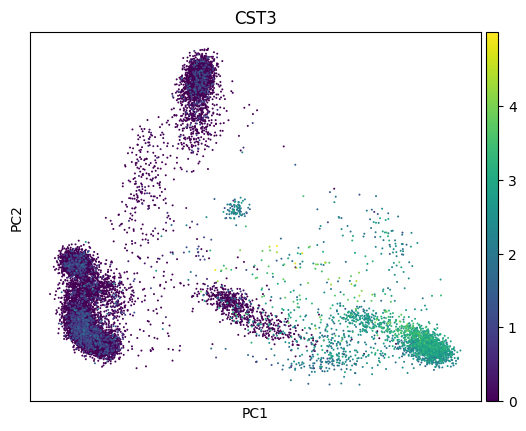

In [ ]:
# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')  # Example of coloring by a specific gene


In [ ]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.3 MB/s eta 0:00:00


In [ ]:
pip install python-igraph

In [ ]:
!pip install louvain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.2 MB/s eta 0:00:00


**Computing the neighborhood graph:**

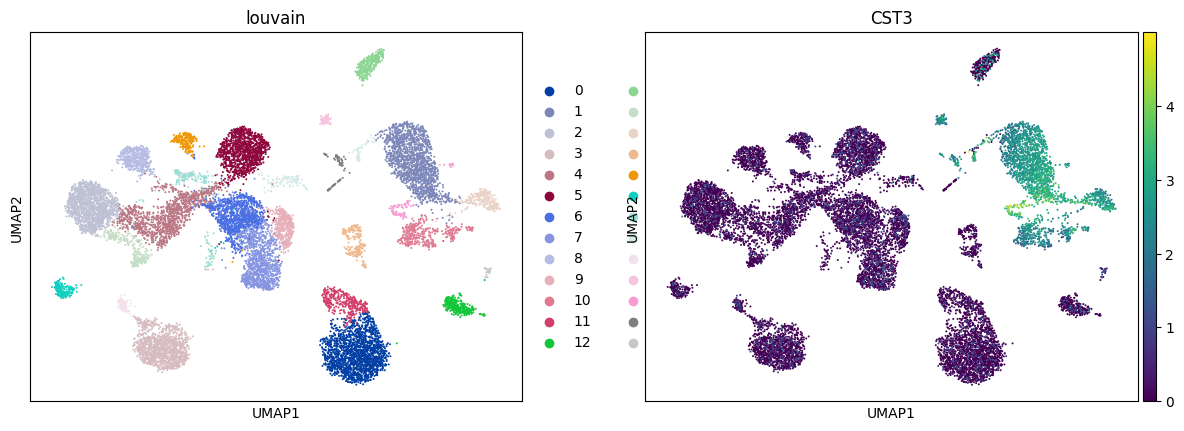

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

**Louvain clustering**

In [ ]:
sc.tl.louvain(adata)
sc.pl.umap(adata, color=['louvain', 'CST3'])  # Color by clusters and gene

**Visualization using UMAP Plot:**

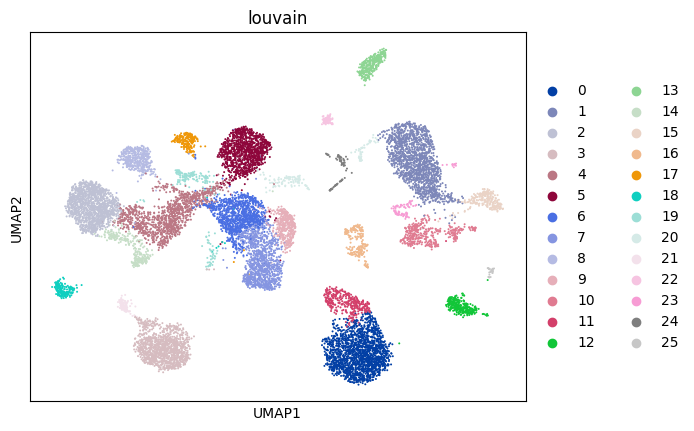

In [ ]:
sc.pl.umap(adata, color=['louvain'])


### **Differential Gene Expression:**

In [ ]:
adata.write("processed_scRNAseq_data.h5ad")

In [ ]:
import scanpy as sc

# Load processed data
adata = sc.read("processed_scRNAseq_data.h5ad")

# Continue analysis
sc.pl.umap(adata, color='louvain')  # Example: visualize UMAP with clusters


In [ ]:
print(adata.obs['louvain'].unique())

['3', '24', '4', '19', '10', ..., '21', '15', '18', '23', '25']
Length: 26
Categories (26, object): ['0', '1', '2', '3', ..., '22', '23', '24', '25']


**Differential gene expression analysis between clusters and visualization:**

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

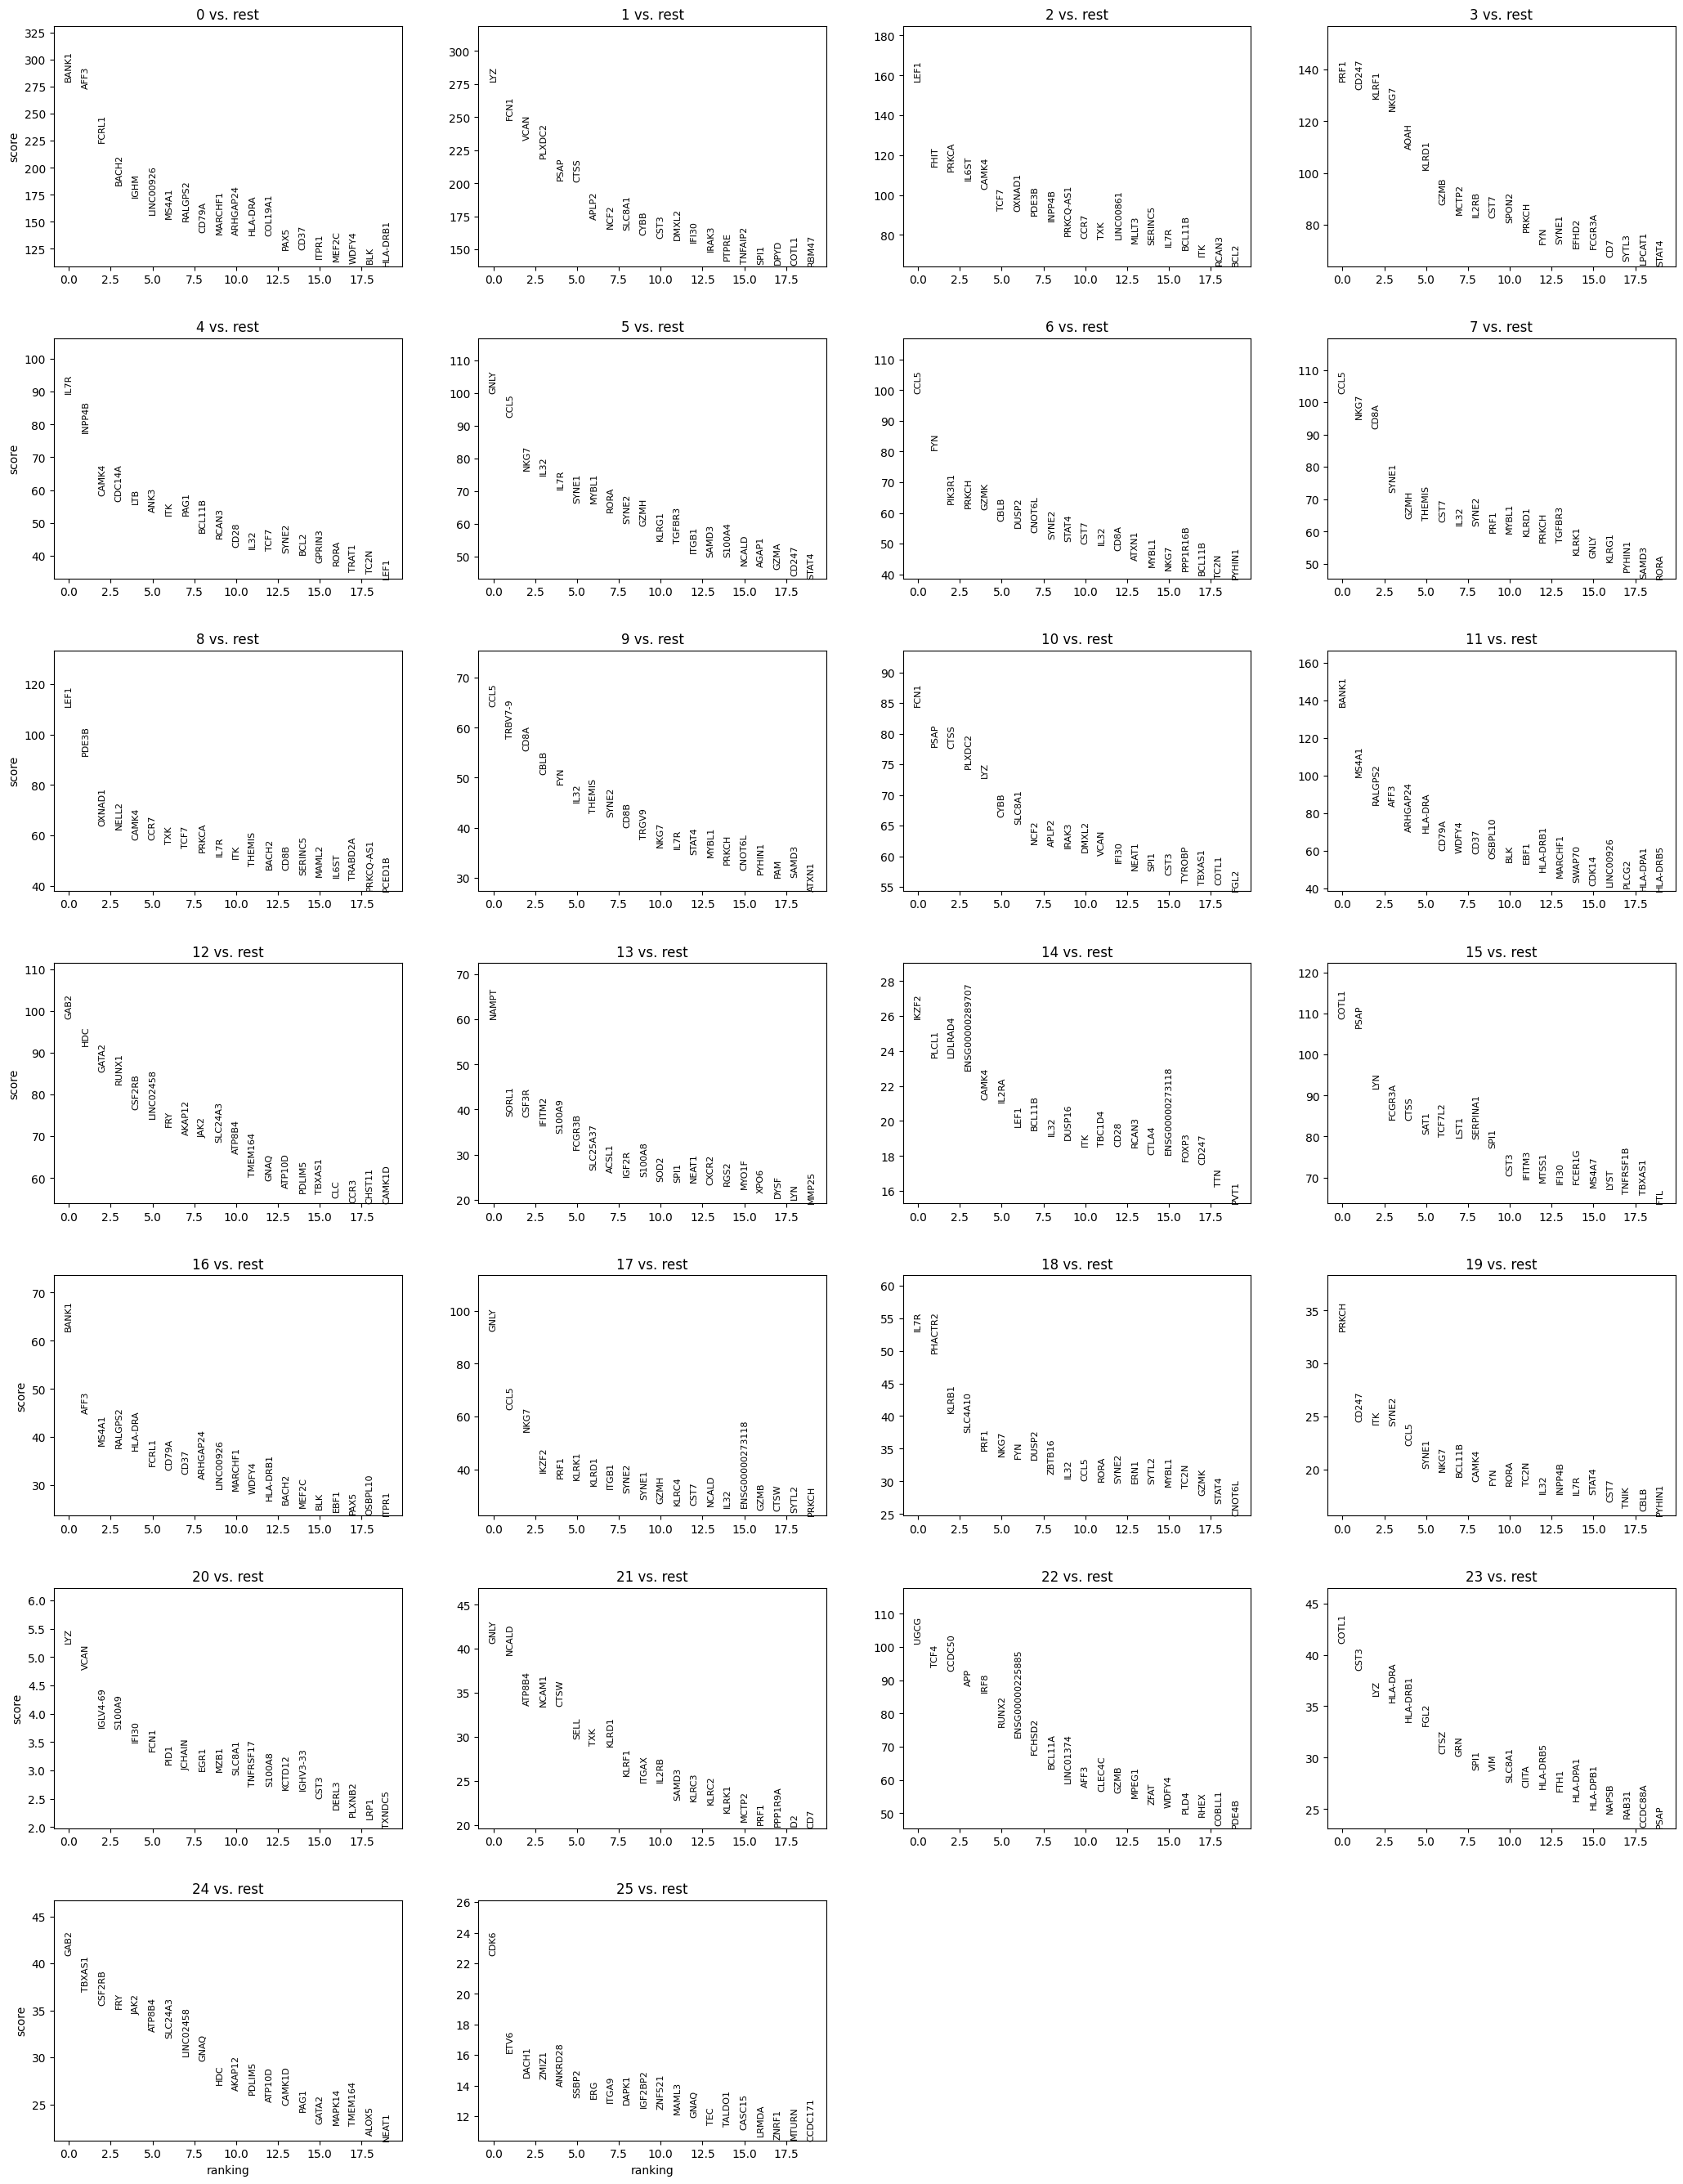

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')

# Visualize the top differentially expressed genes per cluster
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)


In [ ]:
adata.X = adata.X.astype('float32')
adata.obs['louvain'] = adata.obs['louvain'].astype('category')


In [ ]:
def improved_rank_genes_groups(adata, groupby):
    # Collect all results into lists
    names_list = []
    scores_list = []
    pvals_list = []
    pvals_adj_list = []
    logfoldchanges_list = []


    result = sc.tl.rank_genes_groups(adata, groupby, method='t-test', copy=True)

    for group in result.uns['rank_genes_groups']['names'].dtype.names:
        names_list.append(result.uns['rank_genes_groups']['names'][group])
        scores_list.append(result.uns['rank_genes_groups']['scores'][group])
        pvals_list.append(result.uns['rank_genes_groups']['pvals'][group])
        pvals_adj_list.append(result.uns['rank_genes_groups']['pvals_adj'][group])
        logfoldchanges_list.append(result.uns['rank_genes_groups']['logfoldchanges'][group])


    df = pd.DataFrame({
        'names': pd.concat(names_list, axis=1),
        'scores': pd.concat(scores_list, axis=1),
        'pvals': pd.concat(pvals_list, axis=1),
        'pvals_adj': pd.concat(pvals_adj_list, axis=1),
        'logfoldchanges': pd.concat(logfoldchanges_list, axis=1)
    })

    return df

In [ ]:
#op ranked genes for each cluster
top_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)
print(top_genes)


           0       1          2      3       4       5         6       7  \
0      FCRL1    VCAN       FHIT  KLRF1  INPP4B    GNLY      GZMK    CD8A   
1       AFF3     LYZ       LEF1  CD247    IL7R    GZMH       FYN    GZMH   
2      BACH2    FCN1      IL6ST   PRF1  CDC14A   AGAP1     DUSP2    NKG7   
3  LINC00926  PLXDC2      PRKCA  IL2RB    ANK3   KLRG1    PIK3R1   KLRD1   
4       IGHM   APLP2  PRKCQ-AS1   GZMB     LTB   MYBL1      CCL5    CCL5   
5      BANK1    DPYD     OXNAD1  SPON2    PAG1    IL32    CNOT6L   SYNE1   
6    COL19A1   DMXL2       TCF7   AOAH   RCAN3    RORA      CD8A  THEMIS   
7       PAX5    LRP1      MLLT3  KLRD1    CD28   SYNE1      CBLB    CST7   
8      CD79A    FGD4      CAMK4   NKG7   CAMK4   ITGB1  PPP1R16B  TGFBR3   
9    RALGPS2    CTSS       CCR7  MCTP2    TCF7  TGFBR3      CD8B   KLRK1   

         8        9  ...         16               17       18         19  \
0    NELL2  TRBV7-9  ...      CD79A             GNLY  SLC4A10      CD247   
1    PDE3B 

**Heatmap:**

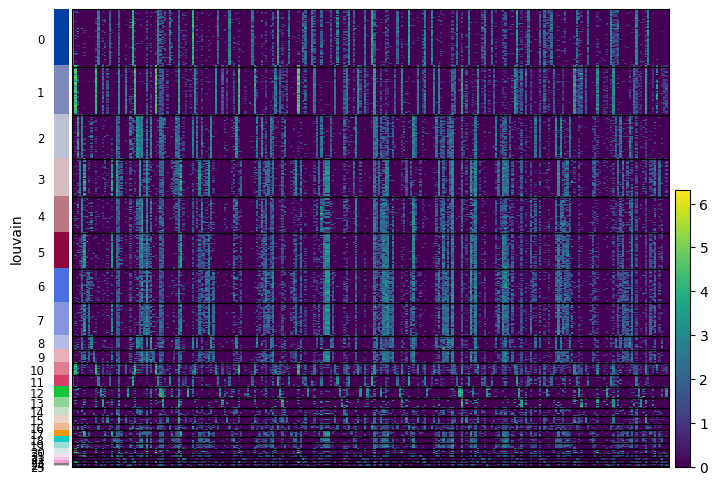

In [ ]:
# Ensuring that the data is in float format for plotting
adata.X = adata.X.astype(float)


sc.pl.heatmap(adata, var_names=top_genes.values.flatten(), groupby='louvain', use_raw=False)


### **Violin Plots of Gene Expression:**

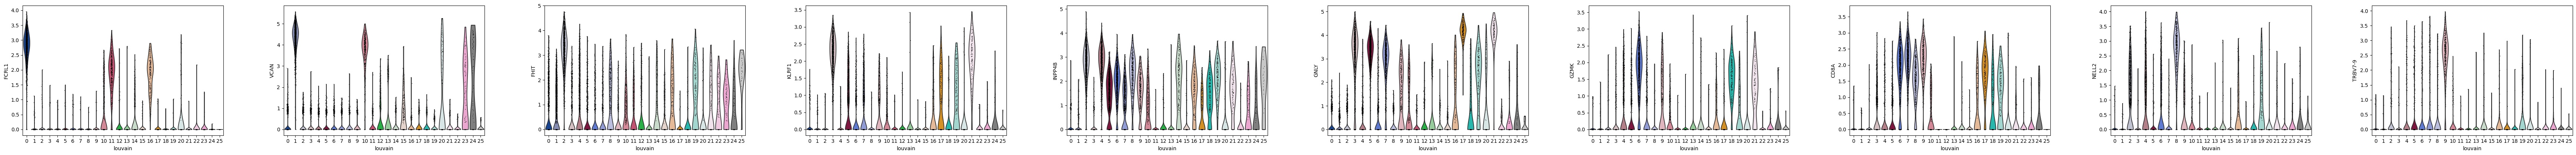

In [ ]:
sc.pl.violin(adata, keys=top_genes.values.flatten()[:10], groupby='louvain', use_raw=False)

**Differential expression results for one of the clusters:**

In [ ]:
sc.get.rank_genes_groups_df(adata, group='0')  # Replace '0' with a cluster number


,names,scores,logfoldchanges,pvals,pvals_adj
0,FCRL1,68.334213,6.954307,0.0,0.0
1,AFF3,68.271103,6.494913,0.0,0.0
2,BACH2,67.967941,4.738580,0.0,0.0
3,LINC00926,66.993156,6.388383,0.0,0.0
4,IGHM,66.865685,6.587820,0.0,0.0
...,...,...,...,...,...
3485,S100A4,-51.109547,-3.966904,0.0,0.0
3486,FYN,-51.973434,-2.887304,0.0,0.0
3487,NEAT1,-53.125351,-3.327051,0.0,0.0
3488,PRKCH,-53.488712,-6.738965,0.0,0.0


In [ ]:
# Saving top-ranked genes
top_genes.to_csv("top_ranked_genes.csv")

# Saving differential expression results
adata.write("processed_data_with_ranked_genes.h5ad")
